In [85]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
train_raw=pd.read_csv('../data/Train.csv')
train_fft=pd.read_csv("../data/train_fft.csv")

In [87]:
train_fft.head(6)

,Unnamed: 0,ID,location,temp,precip,rel_humidity,wind_dir,wind_spd,atmos_press,target
0,0,ID_train_0,C,"[19.091786634686738, 19.727267738227102, 20.53...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.8972319028454736, 0.8674478111494428, 0.830...","[374.23998749385305, 239.62946651396945, 167.7...","[0.9137784090624989, 0.7073958333749842, 0.647...","[87.78177181657144, 87.75236084196504, 87.7467...",45.126304
1,1,ID_train_1,D,"[22.53333333, 21.71666667, 20.83333333, 20.983...","[0.102, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.034, 0...","[0.744583333, 0.808083333, 0.911166667, 0.9163...","[281.6643101, 89.15629262, 81.96853891, 291.01...","[2.3775, 1.126666667, 0.700833333, 0.341666667...","[90.32, 90.3775, 90.44083333, 90.4725, 90.4541...",79.131702
2,2,ID_train_10,A,"[28.975, 27.95, 29.6, 26.425, 22.09166667, 21....","[0.0, 0.0, 0.0, 0.102, 0.136, 0.0, 0.0, 2.16, ...","[0.573333333, 0.597166667, 0.5668333329999999,...","[253.66021213814548, 237.6269196910579, 242.07...","[1.6275610371039955, 1.8423616295519998, 1.938...","[88.55166667, 88.46416667, 88.31916667, 88.24,...",32.661304
3,3,ID_train_100,A,"[22.96666667, 24.26666667, 25.275, 25.625, 25....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.77,...","[0.8430833329999999, 0.79025, 0.7375, 0.728, 0...","[300.0850574, 293.6769595, 294.5174647, 301.92...","[1.446666667, 1.1925, 1.324166667, 1.544166666...","[88.615, 88.53083333, 88.4, 88.27166667, 88.20...",53.850238
4,4,ID_train_1000,A,"[21.875, 21.575, 21.525, 21.43333333, 20.50833...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.8564166670000001, 0.874916667, 0.879833333,...","[21.83997432000001, 17.054053409999995, 89.264...","[0.1975, 0.244166667, 0.411666667, 0.56, 0.577...","[88.55666667, 88.64083333, 88.65833333, 88.647...",177.418750
5,5,ID_train_10000,E,"[26.225, 26.25, 26.95833333, 27.925, 28.416666...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.7566666670000001, 0.7090833329999999, 0.632...","[171.23253258391134, 104.3737208, 161.28512859...","[1.2329755383275747, 1.4858333330000002, 1.090...","[88.56583333, 88.55, 88.50916667, 88.44083333,...",17.005000


In [88]:
features=["temp","precip","rel_humidity","wind_dir","wind_spd","atmos_press"]
for feature in features : 
    train_fft[feature]=train_fft[feature].apply(lambda x: x[1:-1])

In [89]:
train_fft.head(2)

,Unnamed: 0,ID,location,temp,precip,rel_humidity,wind_dir,wind_spd,atmos_press,target
0,0,ID_train_0,C,"19.091786634686738, 19.727267738227102, 20.538...","0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","0.8972319028454736, 0.8674478111494428, 0.8302...","374.23998749385305, 239.62946651396945, 167.71...","0.9137784090624989, 0.7073958333749842, 0.6473...","87.78177181657144, 87.75236084196504, 87.74676...",45.126304
1,1,ID_train_1,D,"22.53333333, 21.71666667, 20.83333333, 20.9833...","0.102, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.034, 0....","0.744583333, 0.808083333, 0.911166667, 0.91633...","281.6643101, 89.15629262, 81.96853891, 291.018...","2.3775, 1.126666667, 0.700833333, 0.3416666670...","90.32, 90.3775, 90.44083333, 90.4725, 90.45416...",79.131702


In [90]:
features=["temp","precip","rel_humidity","wind_dir","wind_spd","atmos_press"]
for feature in features : 
    train_fft[feature]=train_fft[feature].apply(lambda x: [ float(X) for X in x.split(",")])


In [91]:
train_fft.head(2)

,Unnamed: 0,ID,location,temp,precip,rel_humidity,wind_dir,wind_spd,atmos_press,target
0,0,ID_train_0,C,"[19.091786634686738, 19.727267738227102, 20.53...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.8972319028454736, 0.8674478111494428, 0.830...","[374.23998749385305, 239.62946651396945, 167.7...","[0.9137784090624989, 0.7073958333749842, 0.647...","[87.78177181657144, 87.75236084196504, 87.7467...",45.126304
1,1,ID_train_1,D,"[22.53333333, 21.71666667, 20.83333333, 20.983...","[0.102, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.034, 0...","[0.744583333, 0.808083333, 0.911166667, 0.9163...","[281.6643101, 89.15629262, 81.96853891, 291.01...","[2.3775, 1.126666667, 0.700833333, 0.341666667...","[90.32, 90.3775, 90.44083333, 90.4725, 90.4541...",79.131702


In [92]:
#setting humidity max to 1
def replace_to_one(x):
    if x > 1 :
        return 1.0
    else :
        return float(x)
features_max_one = ["rel_humidity"]
for feature in features_max_one : 
    train_fft[feature]=train_fft[feature].apply(lambda x: [replace_to_one(X) for X in x])

In [93]:
train_fft.head()

,Unnamed: 0,ID,location,temp,precip,rel_humidity,wind_dir,wind_spd,atmos_press,target
0,0,ID_train_0,C,"[19.091786634686738, 19.727267738227102, 20.53...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.8972319028454736, 0.8674478111494428, 0.830...","[374.23998749385305, 239.62946651396945, 167.7...","[0.9137784090624989, 0.7073958333749842, 0.647...","[87.78177181657144, 87.75236084196504, 87.7467...",45.126304
1,1,ID_train_1,D,"[22.53333333, 21.71666667, 20.83333333, 20.983...","[0.102, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.034, 0...","[0.744583333, 0.808083333, 0.911166667, 0.9163...","[281.6643101, 89.15629262, 81.96853891, 291.01...","[2.3775, 1.126666667, 0.700833333, 0.341666667...","[90.32, 90.3775, 90.44083333, 90.4725, 90.4541...",79.131702
2,2,ID_train_10,A,"[28.975, 27.95, 29.6, 26.425, 22.09166667, 21....","[0.0, 0.0, 0.0, 0.102, 0.136, 0.0, 0.0, 2.16, ...","[0.573333333, 0.597166667, 0.5668333329999999,...","[253.66021213814548, 237.6269196910579, 242.07...","[1.6275610371039955, 1.8423616295519998, 1.938...","[88.55166667, 88.46416667, 88.31916667, 88.24,...",32.661304
3,3,ID_train_100,A,"[22.96666667, 24.26666667, 25.275, 25.625, 25....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.77,...","[0.8430833329999999, 0.79025, 0.7375, 0.728, 0...","[300.0850574, 293.6769595, 294.5174647, 301.92...","[1.446666667, 1.1925, 1.324166667, 1.544166666...","[88.615, 88.53083333, 88.4, 88.27166667, 88.20...",53.850238
4,4,ID_train_1000,A,"[21.875, 21.575, 21.525, 21.43333333, 20.50833...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.8564166670000001, 0.874916667, 0.879833333,...","[21.83997432000001, 17.054053409999995, 89.264...","[0.1975, 0.244166667, 0.411666667, 0.56, 0.577...","[88.55666667, 88.64083333, 88.65833333, 88.647...",177.418750


In [94]:
#compressing wind_dir to range [0,360]
def compress_wind_dir(x,x_min,x_max):
    if x_min < 0 and x_max > 360:
        return (x-x_min)*360/(x_max-x_min)
    elif x_min < 0 and x_max <= 360:
        return (x-x_min)*x_max/(x_max-x_min)
    elif x_min >= 0 and x_max > 360 :
        return x*360/x_max
    else :
        return float(x)
train_fft["wind_dir"] = train_fft["wind_dir"].apply(lambda x: [compress_wind_dir(X,min(x),max(x)) for X in x])

In [95]:
# covert features  fron string to List of values 
def replace_nan(x):
    if x==" ":
        return np.nan
    else :
        return float(x)
features=["temp","precip","rel_humidity","wind_dir","wind_spd","atmos_press"]
for feature in features : 
    train_raw[feature]=train_raw[feature].apply(lambda x: [ replace_nan(X) for X in x.replace("nan"," ").split(",")])

<AxesSubplot:>

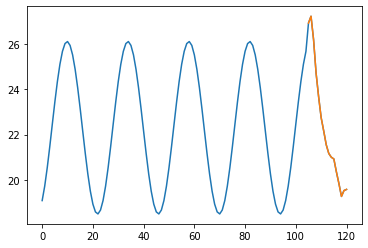

In [96]:
x = [i for i in range(0,121,1)]

sns.lineplot(x=x, y=train_fft.loc[0,'temp'])
sns.lineplot(x=x, y=train_raw.loc[0,'temp'])

<AxesSubplot:>

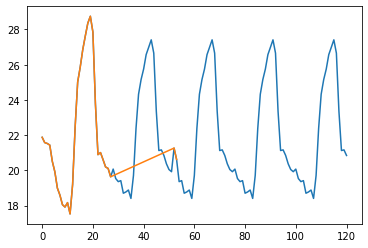

In [97]:
sns.lineplot(x=x, y=train_fft.loc[4,'temp'])
sns.lineplot(x=x, y=train_raw.loc[4,'temp'])


<AxesSubplot:>

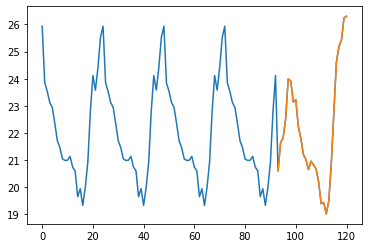

In [98]:
sns.lineplot(x=x, y=train_fft.loc[9,'temp'])
sns.lineplot(x=x, y=train_raw.loc[9,'temp'])


<AxesSubplot:>

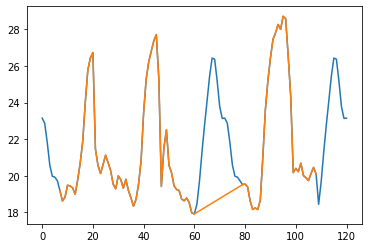

In [99]:
sns.lineplot(x=x, y=train_fft.loc[17,'temp'])
sns.lineplot(x=x, y=train_raw.loc[17,'temp'])

<AxesSubplot:>

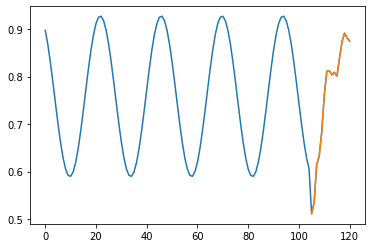

In [100]:
sns.lineplot(x=x, y=train_fft.loc[0,'rel_humidity'])
sns.lineplot(x=x, y=train_raw.loc[0,'rel_humidity'])

<AxesSubplot:>

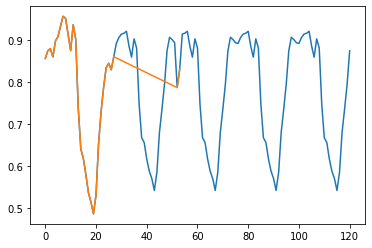

In [101]:
sns.lineplot(x=x, y=train_fft.loc[4,'rel_humidity'])
sns.lineplot(x=x, y=train_raw.loc[4,'rel_humidity'])

<AxesSubplot:>

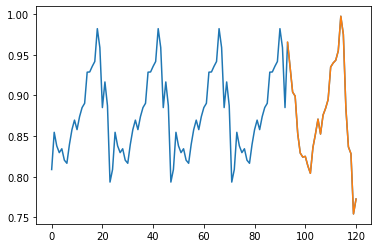

In [102]:
sns.lineplot(x=x, y=train_fft.loc[9,'rel_humidity'])
sns.lineplot(x=x, y=train_raw.loc[9,'rel_humidity'])

<AxesSubplot:>

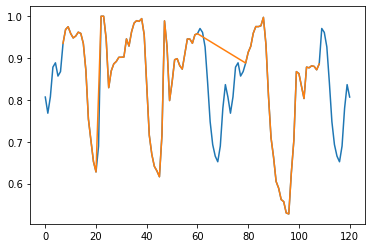

In [103]:
sns.lineplot(x=x, y=train_fft.loc[17,'rel_humidity'])
sns.lineplot(x=x, y=train_raw.loc[17,'rel_humidity'])

<AxesSubplot:>

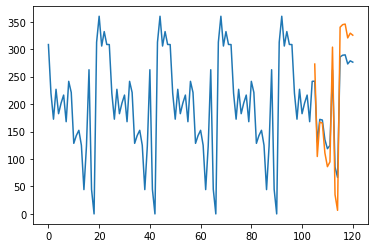

In [104]:
sns.lineplot(x=x, y=train_fft.loc[0,'wind_dir'])
sns.lineplot(x=x, y=train_raw.loc[0,'wind_dir'])

<AxesSubplot:>

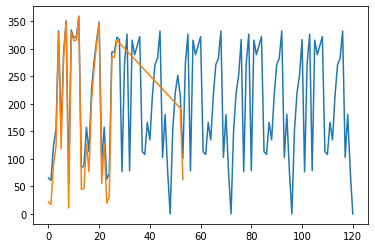

In [105]:
sns.lineplot(x=x, y=train_fft.loc[4,'wind_dir'])
sns.lineplot(x=x, y=train_raw.loc[4,'wind_dir'])

<AxesSubplot:>

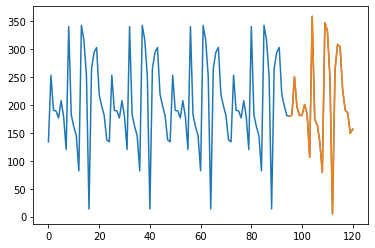

In [106]:
sns.lineplot(x=x, y=train_fft.loc[9,'wind_dir'])
sns.lineplot(x=x, y=train_raw.loc[9,'wind_dir'])

<AxesSubplot:>

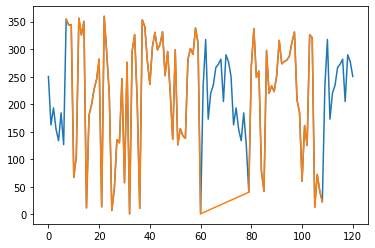

In [107]:
sns.lineplot(x=x, y=train_fft.loc[17,'wind_dir'])
sns.lineplot(x=x, y=train_raw.loc[17,'wind_dir'])

<AxesSubplot:>

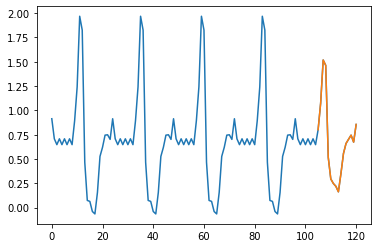

In [108]:
sns.lineplot(x=x, y=train_fft.loc[0,'wind_spd'])
sns.lineplot(x=x, y=train_raw.loc[0,'wind_spd'])

<AxesSubplot:>

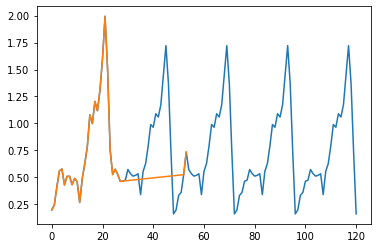

In [109]:
sns.lineplot(x=x, y=train_fft.loc[4,'wind_spd'])
sns.lineplot(x=x, y=train_raw.loc[4,'wind_spd'])

<AxesSubplot:>

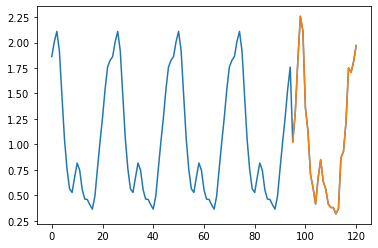

In [110]:
sns.lineplot(x=x, y=train_fft.loc[9,'wind_spd'])
sns.lineplot(x=x, y=train_raw.loc[9,'wind_spd'])

<AxesSubplot:>

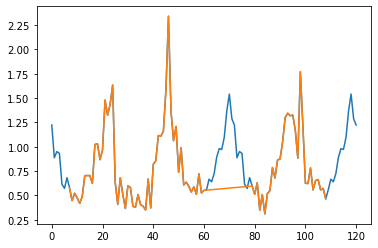

In [111]:
sns.lineplot(x=x, y=train_fft.loc[17,'wind_spd'])
sns.lineplot(x=x, y=train_raw.loc[17,'wind_spd'])

<AxesSubplot:>

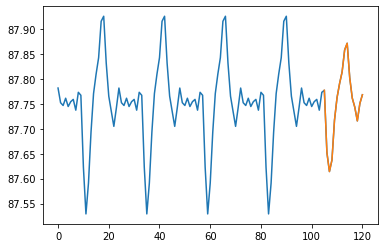

In [112]:
sns.lineplot(x=x, y=train_fft.loc[0,'atmos_press'])
sns.lineplot(x=x, y=train_raw.loc[0,'atmos_press'])

<AxesSubplot:>

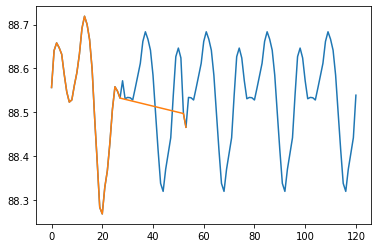

In [113]:
sns.lineplot(x=x, y=train_fft.loc[4,'atmos_press'])
sns.lineplot(x=x, y=train_raw.loc[4,'atmos_press'])

<AxesSubplot:>

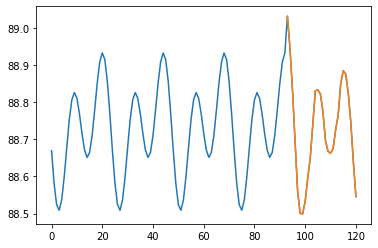

In [114]:
sns.lineplot(x=x, y=train_fft.loc[9,'atmos_press'])
sns.lineplot(x=x, y=train_raw.loc[9,'atmos_press'])

<AxesSubplot:>

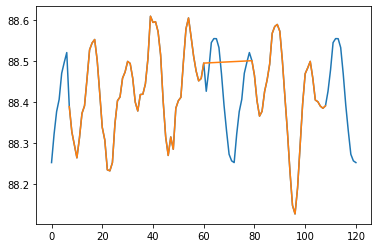

In [115]:
sns.lineplot(x=x, y=train_fft.loc[17,'atmos_press'])
sns.lineplot(x=x, y=train_raw.loc[17,'atmos_press'])

In [119]:
def percentile(n):
    def percentile_(x):
        return np.percentile(x, n)
    percentile_.__name__ = 'percentile_%s' % n
    return percentile_

In [120]:
def aggregate_features(x,col_name):
    x["max_"+col_name]=x[col_name].apply(np.max)
    x["min_"+col_name]=x[col_name].apply(np.min)
    x["mean_"+col_name]=x[col_name].apply(np.mean)
    x["std_"+col_name]=x[col_name].apply(np.std)
    x["var_"+col_name]=x[col_name].apply(np.var)
    x["median_"+col_name]=x[col_name].apply(np.median)
    x["ptp_"+col_name]=x[col_name].apply(np.ptp)
    x["p1_"+col_name]=x[col_name].apply(percentile(1))
    x["p5_"+col_name]=x[col_name].apply(percentile(5))
    x["p10_"+col_name]=x[col_name].apply(percentile(10))
    x["p20_"+col_name]=x[col_name].apply(percentile(20))
    x["p30_"+col_name]=x[col_name].apply(percentile(30))
    x["p40_"+col_name]=x[col_name].apply(percentile(40))
    x["p60_"+col_name]=x[col_name].apply(percentile(60))
    x["p70_"+col_name]=x[col_name].apply(percentile(70))
    x["p80_"+col_name]=x[col_name].apply(percentile(80))
    x["p90_"+col_name]=x[col_name].apply(percentile(90))
    x["p95_"+col_name]=x[col_name].apply(percentile(95))
    x["p99_"+col_name]=x[col_name].apply(percentile(99))
    return x  

In [121]:
final_train = train_fft.copy()
features=["temp","precip","rel_humidity","wind_dir","wind_spd","atmos_press"]

for col_name in features:
    final_train = aggregate_features(final_train,col_name)

for x in range(121):
    final_train["temp"+ str(x)] = final_train.temp.str[x]
    final_train["precip"+ str(x)] = final_train.precip.str[x]
    final_train["rel_humidity"+ str(x)] = final_train.rel_humidity.str[x]
    final_train["wind_dir"+ str(x)] = final_train.wind_dir.str[x]
    final_train["windspeed"+ str(x)] = final_train.wind_spd.str[x]
    final_train["atmospherepressure"+ str(x)] = final_train.atmos_press.str[x]

features=["temp","precip","rel_humidity","wind_dir","wind_spd","atmos_press"]
final_train.drop(features,1,inplace=True)


In [122]:
final_train.head(2)

,Unnamed: 0,ID,location,target,max_temp,min_temp,mean_temp,std_temp,var_temp,median_temp,...,rel_humidity119,wind_dir119,windspeed119,atmospherepressure119,temp120,precip120,rel_humidity120,wind_dir120,windspeed120,atmospherepressure120
0,0,ID_train_0,C,45.126304,27.208333,18.505041,22.308697,2.642953,6.985200,22.142764,...,0.88150,278.798377,0.673333,87.750833,19.583333,0.000,0.874583,276.364023,0.855000,87.768333
1,1,ID_train_1,D,79.131702,33.616667,17.983333,24.679063,4.266955,18.206903,23.791667,...,0.64925,73.528733,1.475833,90.439167,21.450000,0.561,0.797333,296.967254,1.019167,90.529167


In [128]:
final_train.drop('Unnamed: 0',1,inplace=True)

In [129]:
final_train.head(2)

,ID,location,target,max_temp,min_temp,mean_temp,std_temp,var_temp,median_temp,ptp_temp,...,rel_humidity119,wind_dir119,windspeed119,atmospherepressure119,temp120,precip120,rel_humidity120,wind_dir120,windspeed120,atmospherepressure120
0,ID_train_0,C,45.126304,27.208333,18.505041,22.308697,2.642953,6.985200,22.142764,8.703293,...,0.88150,278.798377,0.673333,87.750833,19.583333,0.000,0.874583,276.364023,0.855000,87.768333
1,ID_train_1,D,79.131702,33.616667,17.983333,24.679063,4.266955,18.206903,23.791667,15.633333,...,0.64925,73.528733,1.475833,90.439167,21.450000,0.561,0.797333,296.967254,1.019167,90.529167


In [130]:
final_train.to_csv('../data/train_fft_final.csv')